In [82]:
from sklearn import cluster, datasets
from sklearn.neighbors import radius_neighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.utils.graph import graph_laplacian
from sklearn.cluster import KMeans
import scipy 
import matplotlib.pyplot as plt
import numpy as np

In [140]:
def spectral_clustering(X):

    #graph connectivity, making a weighted graph that considers an egde between 10 nearest neighbors
    connectivity=radius_neighbors_graph(X,0.5, mode='connectivity', include_self=False)
    print (connectivity.shape)
    #Calculating degree matrix
    D=np.zeros(connectivity.shape)
    for i in range(1000):
        #print (np.sum(connectivity[i,:]))
        D[i][i]=np.sum(connectivity[i,:])

    lp=D-connectivity
    #Calculating LP
    #lp=graph_laplacian(connectivity, normed=False, return_diag=False)
    #Calculating Eigen Vectors
    eigenval,eigenvec=scipy.sparse.linalg.eigsh(lp,k=2,sigma=eps)

    #vecs=vecs.T
    kmeans = KMeans(n_clusters=2, random_state=0).fit(eigenvec)
    print (kmeans.labels_.shape)

    plt.title("Clustered")
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    plt.show()

(1000, 1000)
(1000,)


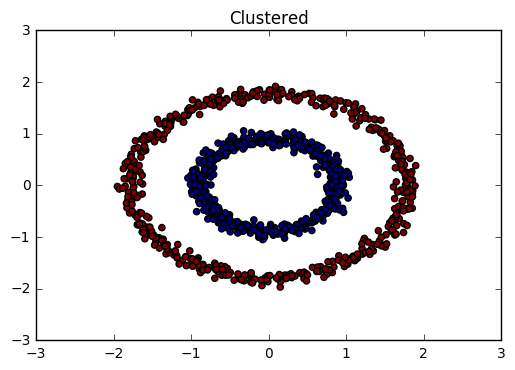

In [142]:
# create a graph first
# Generate dataset. 
n_samples=1000
noisy_circles=datasets.make_circles(n_samples=n_samples,factor=.5,noise=.04)
X,Y=noisy_circles
#normalize dataset for easy parameter estimation
X=StandardScaler().fit_transform(X)
spectral_clustering(X)

(1000, 1000)
(1000,)


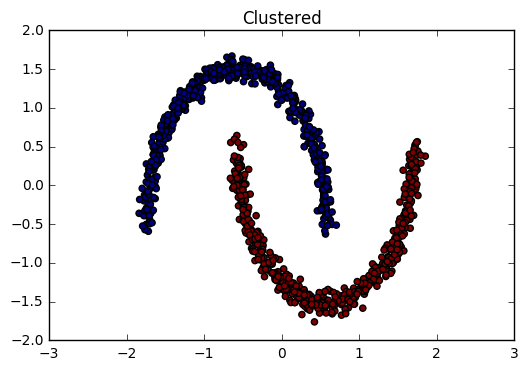

In [144]:
noisy_moons=datasets.make_moons(n_samples=n_samples,noise=.04)
X,Y=noisy_moons
#normalize dataset for easy parameter estimation
X=StandardScaler().fit_transform(X)
spectral_clustering(X)